To build a classification model from given dataset that person has Diabetes or not.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv ")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA

# Scatterplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

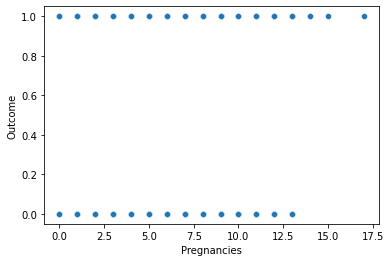

In [5]:
import seaborn as sns
sns.scatterplot(x="Pregnancies",y="Outcome", data=df)

we can see no. of weeks of pregnancies is equally distributedin the range 0 to 13

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

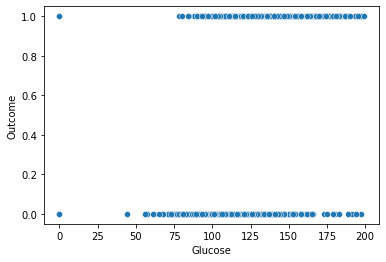

In [6]:
sns.scatterplot(x="Glucose",y="Outcome", data=df)

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

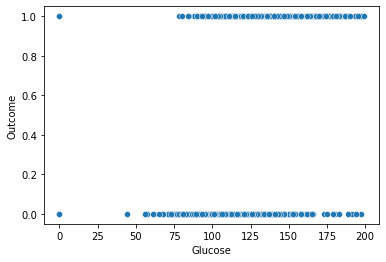

In [7]:
sns.scatterplot(x="Glucose",y="Outcome", data=df)

<AxesSubplot:xlabel='SkinThickness', ylabel='Outcome'>

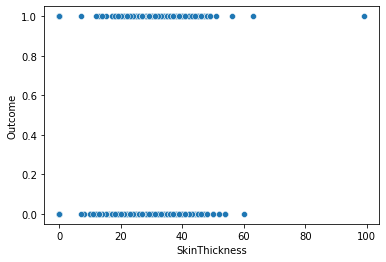

In [8]:
sns.scatterplot(x="SkinThickness",y="Outcome", data=df)

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

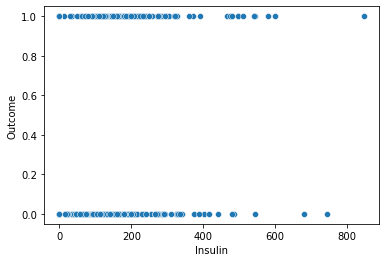

In [9]:
sns.scatterplot(x="Insulin",y="Outcome", data=df)

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

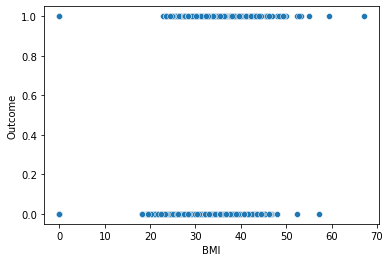

In [10]:
sns.scatterplot(x="BMI",y="Outcome", data=df)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

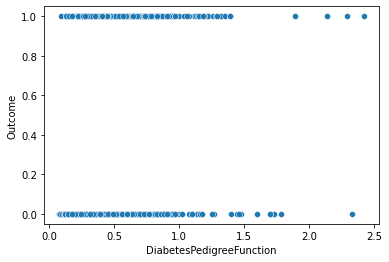

In [11]:
sns.scatterplot(x="DiabetesPedigreeFunction",y="Outcome", data=df)

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

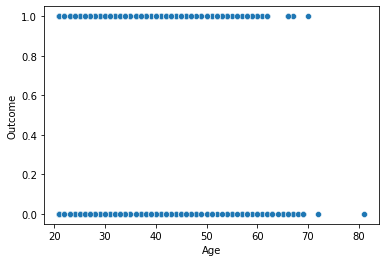

In [12]:
sns.scatterplot(x="Age",y="Outcome", data=df)

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Correlation 

<AxesSubplot:>

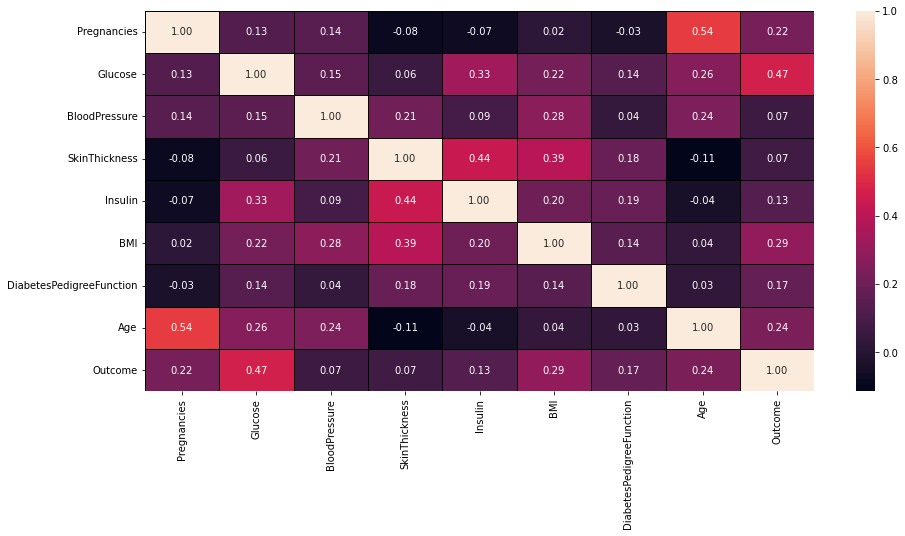

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt= '.2f'  )

max correaltion - glucose, 
min correlation - skinthickness

# describing dataset

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
##plt.figure(figsize=(15,12))
##sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot=True,fmt='f')
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=12)
#plt.title("Variables summary")
#plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# CHECKING OUTLIERS

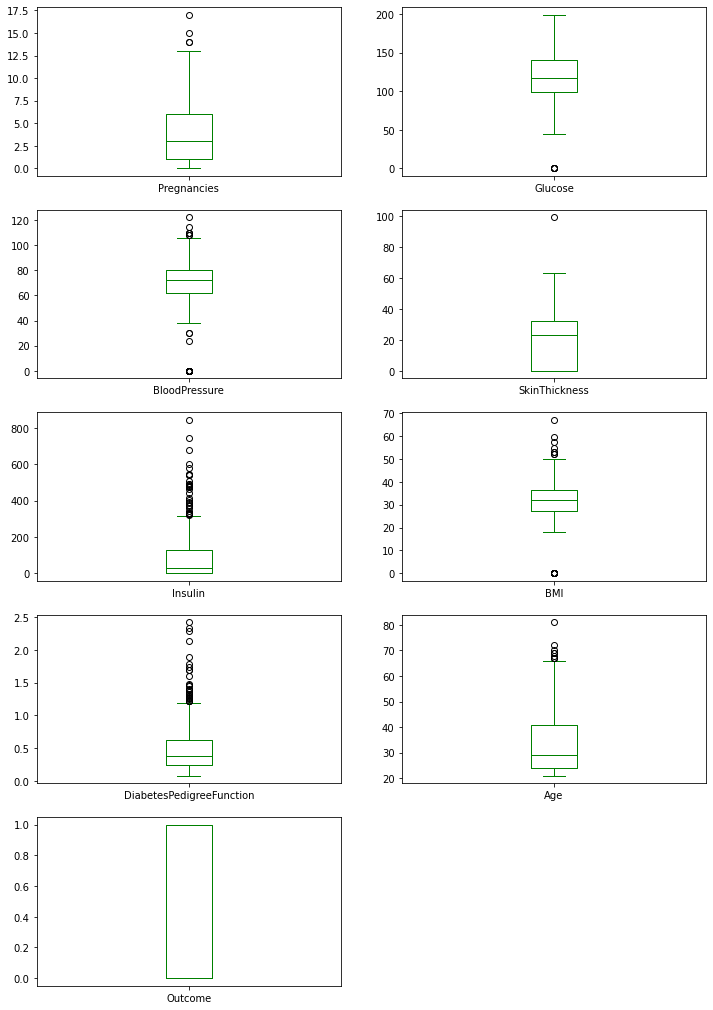

In [21]:
df.plot(kind='box', figsize=(12,18), color='green', layout=(5,2), subplots=True)
plt.show()

<AxesSubplot:>

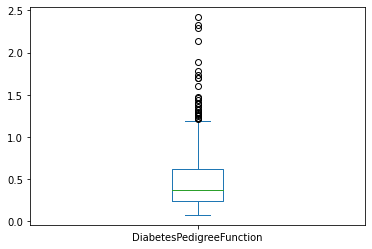

In [19]:
df['DiabetesPedigreeFunction'].plot.box()

<AxesSubplot:>

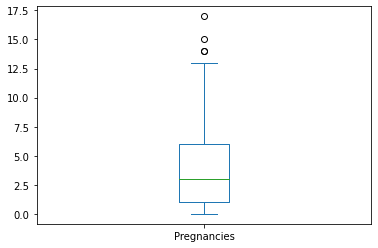

In [20]:
df['Pregnancies'].plot.box()

    we have high outliers in insulin,DiabetesPedigreeFunction and age 
    others have low no. of outliers
    output has no outliers

# Checking skewness

In [21]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

outcome of skewness : skewness threshhold is taken as +/-0.65
high skewness: pregnancies
               BloodPressure
               Insulin
               DiabetesPedigreeFunction
               Age

# Normal Distribution Curve

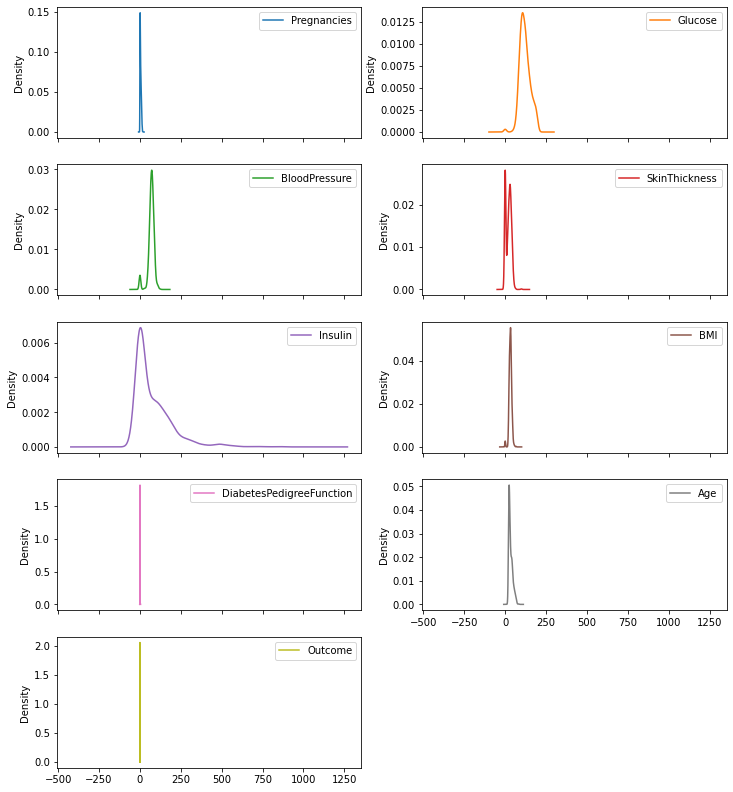

In [24]:
df.plot(kind = 'density', subplots = True, layout = (5,2), figsize=(12,14))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

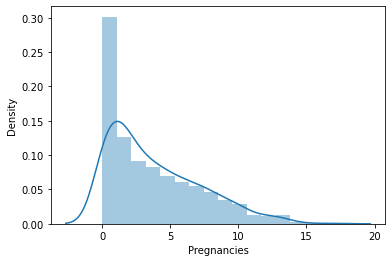

In [25]:
sns.distplot(df["Pregnancies"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

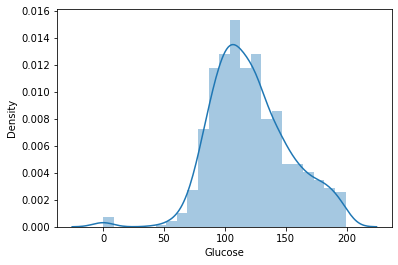

In [26]:
sns.distplot(df["Glucose"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

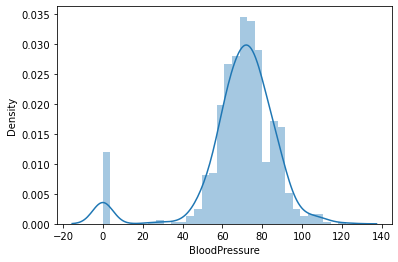

In [27]:
sns.distplot(df["BloodPressure"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

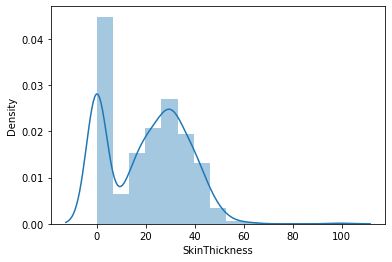

In [28]:
sns.distplot(df["SkinThickness"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

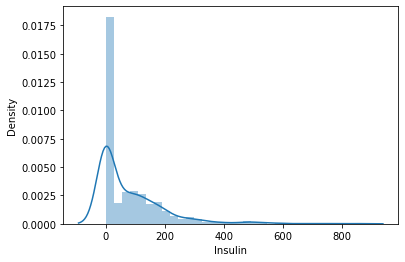

In [29]:
sns.distplot(df["Insulin"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

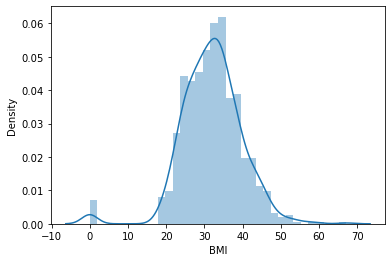

In [30]:
sns.distplot(df["BMI"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

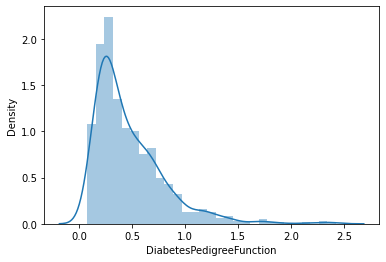

In [31]:
sns.distplot(df["DiabetesPedigreeFunction"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

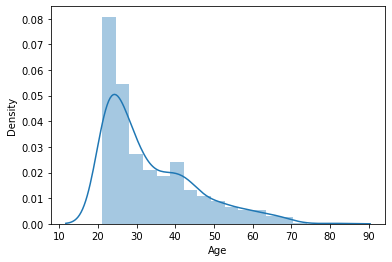

In [32]:
sns.distplot(df["Age"])

data is not normalised. Building blocks are out of the normal curve.

data is also skewwed ,we have seen in density plot.

# normal distributon shows that data is skewed

# Cleaning the data

In [33]:
delete=pd.DataFrame([["0.065068","Blood Pressure", "No","Alot"],["0.074752","SkinThickness","No","Alot"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])

In [34]:
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,0.065068,Blood Pressure,No,Alot
1,0.074752,SkinThickness,No,Alot


setting threshhold of correlation as +/-0.1

In [35]:
df=df.drop(["BloodPressure","SkinThickness"],axis=1)

In [36]:
df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


# Removing Outliers

Z-score Technique

In [37]:
from scipy.stats import zscore

In [38]:
z=np.abs(zscore(df))
z.shape

(768, 7)

In [39]:
threshold=3
print(np.where(z>3))

(array([  4,   8,   9,  13,  45,  49,  58,  60,  75,  81,  88, 111, 123,
       145, 153, 159, 177, 182, 186, 220, 228, 228, 247, 286, 298, 330,
       342, 349, 370, 370, 371, 371, 395, 409, 415, 426, 445, 445, 453,
       455, 459, 486, 494, 502, 522, 584, 593, 621, 645, 655, 666, 673,
       684, 684, 695, 706, 753], dtype=int64), array([4, 2, 3, 2, 4, 3, 4, 3, 1, 3, 0, 2, 5, 3, 2, 0, 3, 1, 2, 2, 2, 4,
       2, 2, 0, 4, 1, 1, 2, 4, 3, 4, 4, 2, 2, 3, 3, 4, 5, 0, 5, 2, 3, 1,
       3, 2, 4, 4, 2, 2, 5, 3, 3, 5, 2, 3, 2], dtype=int64))


In [40]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(768, 7)
(716, 7)


# Percentage  Data Loss

In [41]:
loss_percent=(768-716)/768*100
print(loss_percent)

6.770833333333333


checcking whether how much outliers are still there

Dividing data in features and vectors

In [42]:
x=df_new.drop("Outcome",axis=1)
y=df_new["Outcome"] 

# Transforming the data to remove skewness

In [43]:
from sklearn.preprocessing import power_transform
x=power_transform(x)

In [44]:
x

array([[ 0.81766344,  0.95218058, -1.00223104,  0.28114356,  0.86495337,
         1.39031405],
       [-0.84957557, -1.28238174, -1.00223104, -0.83047682, -0.16002044,
         0.12808007],
       [ 1.20277392,  1.82893792, -1.00223104, -1.43279399,  0.98450779,
         0.23328673],
       ...,
       [ 0.59040907,  0.13114807,  0.96157194, -0.9003888 , -0.75346236,
         0.0156547 ],
       [-0.84957557,  0.29534181, -1.00223104, -0.25021575, -0.1698999 ,
         1.26101626],
       [-0.84957557, -0.92550642, -1.00223104, -0.2028927 , -0.34504064,
        -1.05311184]])

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.81766344,  0.95218058, -1.00223104,  0.28114356,  0.86495337,
         1.39031405],
       [-0.84957557, -1.28238174, -1.00223104, -0.83047682, -0.16002044,
         0.12808007],
       [ 1.20277392,  1.82893792, -1.00223104, -1.43279399,  0.98450779,
         0.23328673],
       ...,
       [ 0.59040907,  0.13114807,  0.96157194, -0.9003888 , -0.75346236,
         0.0156547 ],
       [-0.84957557,  0.29534181, -1.00223104, -0.25021575, -0.1698999 ,
         1.26101626],
       [-0.84957557, -0.92550642, -1.00223104, -0.2028927 , -0.34504064,
        -1.05311184]])

In [1]:
# Using Binary classification model

# training Process begins

finding best training state

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Best random state

In [48]:
maxAccu=0 # maximum accuracy
maxRS =0 #best random state for which maximum accuracy is achieved

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)  # fitting the data trains the model
    predrf = LR.predict(x_test)  #this is the predicted target variable
    acc = accuracy_score(y_test, predrf)  # accuracy score
    print('accuracy_score', acc, 'random_state',i)
    
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy', maxAccu, 'random_state',i)

accuracy_score 0.7 random_state 1
accuracy 0.7 random_state 1
accuracy_score 0.75 random_state 2
accuracy 0.75 random_state 2
accuracy_score 0.65 random_state 3
accuracy_score 0.7 random_state 4
accuracy_score 0.8 random_state 5
accuracy 0.8 random_state 5
accuracy_score 0.85 random_state 6
accuracy 0.85 random_state 6
accuracy_score 0.9 random_state 7
accuracy 0.9 random_state 7
accuracy_score 0.9 random_state 8
accuracy_score 0.8 random_state 9
accuracy_score 0.8 random_state 10
accuracy_score 0.95 random_state 11
accuracy 0.95 random_state 11
accuracy_score 0.65 random_state 12
accuracy_score 0.75 random_state 13
accuracy_score 0.7 random_state 14
accuracy_score 0.75 random_state 15
accuracy_score 0.85 random_state 16
accuracy_score 0.6 random_state 17
accuracy_score 0.9 random_state 18
accuracy_score 0.95 random_state 19
accuracy_score 0.95 random_state 20
accuracy_score 0.8 random_state 21
accuracy_score 0.85 random_state 22
accuracy_score 0.65 random_state 23
accuracy_score 0.8 r

In [49]:
print('Best accuracy is',maxAccu, 'on Random state',maxRS)

Best accuracy is 1.0 on Random state 170


# Ceating Train_test split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20, random_state = 170)

In [61]:
x_train

array([[ 0.81766344,  1.32405816, -1.00223104, -1.24386445, -1.21699942,
         1.39031405],
       [ 0.81766344, -0.55674827, -1.00223104,  0.58011704,  0.98959154,
        -0.23397123],
       [ 0.59040907,  0.42236718, -1.00223104,  1.03702691,  1.5537216 ,
         0.67169905],
       ...,
       [-0.35286331, -0.84076867,  0.8692619 , -0.91799199,  1.16522367,
        -1.26256384],
       [ 0.02356998, -0.67617214,  0.74669623, -2.25527175, -0.51741728,
         0.0156547 ],
       [ 1.36979383,  1.54753234,  1.24985135,  1.8092431 ,  1.10384566,
         1.53951955]])

In [62]:
x_test

array([[ 1.36979383,  0.7246037 , -1.00223104,  0.14866438,  1.13376757,
         1.16484238],
       [-0.84957557,  0.26299648,  0.95469158, -1.24386445, -0.91047808,
        -0.68530595],
       [ 0.02356998,  1.80615838, -1.00223104, -0.18719673, -0.18979552,
        -0.10474232],
       [-0.84957557,  0.23040827, -1.00223104,  0.5940176 ,  0.51463184,
        -1.49228236],
       [ 0.59040907,  1.42478016, -1.00223104,  1.84392305, -0.21492421,
        -0.37301916],
       [ 0.02356998, -0.14524371, -1.00223104, -1.60808859, -1.51825085,
        -1.26256384],
       [ 0.33009943, -0.9685146 , -1.00223104,  1.42798877, -0.80475382,
        -0.10474232],
       [ 0.33009943,  0.1975734 ,  1.13320791,  0.04370368,  0.24966777,
         0.42461338],
       [-0.35286331, -0.32742887,  0.69511024, -1.07874493, -1.61997826,
        -1.49228236],
       [ 0.81766344,  0.1975734 ,  1.2339027 ,  0.28114356,  1.13149054,
         0.42461338],
       [ 0.59040907,  0.69530529,  1.04654304, -0.

In [63]:
y_train

749    1
410    0
179    1
258    0
421    0
      ..
289    0
191    0
565    0
316    0
43     1
Name: Outcome, Length: 572, dtype: int64

In [64]:
y_test

743    1
384    0
317    1
605    0
391    1
      ..
592    1
99     1
553    0
609    0
211    0
Name: Outcome, Length: 144, dtype: int64

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print('Accuracy',accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 81.25
[[84 13]
 [14 33]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        97
           1       0.72      0.70      0.71        47

    accuracy                           0.81       144
   macro avg       0.79      0.78      0.79       144
weighted avg       0.81      0.81      0.81       144



# Decision tree classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 70.83333333333334
[[71 26]
 [16 31]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        97
           1       0.54      0.66      0.60        47

    accuracy                           0.71       144
   macro avg       0.68      0.70      0.68       144
weighted avg       0.73      0.71      0.71       144



# SVC 

In [67]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 80.55555555555556
[[86 11]
 [17 30]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        97
           1       0.73      0.64      0.68        47

    accuracy                           0.81       144
   macro avg       0.78      0.76      0.77       144
weighted avg       0.80      0.81      0.80       144



# Random Forest Clssifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 78.47222222222221
[[82 15]
 [16 31]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        97
           1       0.67      0.66      0.67        47

    accuracy                           0.78       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.78      0.78      0.78       144



Getting good accuracy in RandonForest and SVC, so cross validating to check for overfitting 

# Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(LR, x, y, cv=7)
print('cross validation score of Logistic Regression:',scr.mean())

cross validation score of Logistic Regression: 0.7709880068532267


In [70]:
scr

array([0.72815534, 0.78640777, 0.73529412, 0.7745098 , 0.73529412,
       0.85294118, 0.78431373])

In [71]:
from sklearn.model_selection import cross_val_score

scr2= cross_val_score(rf, x, y, cv=5)
print('cross validation score of Random forest:', scr2.mean())

cross validation score of Random forest: 0.7695609945609945


Logistic Regression is performing better than all

# AUC ROC_CURVE

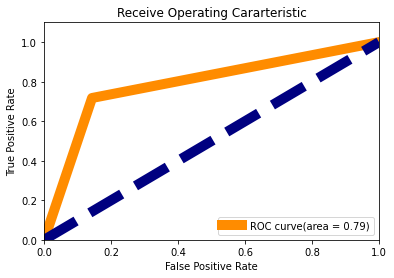

In [80]:
from sklearn.metrics import auc,roc_curve
fpr,tpr,thresholds = roc_curve (predlr,y_test)
roc_auc= auc(fpr,tpr)

plt.figure()
plt.plot( fpr, tpr, color='darkorange', linewidth= 10, label= 'ROC curve(area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', linewidth= 10, linestyle='dashed')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receive Operating Cararteristic')
plt.legend(loc='lower right')
plt.show()

# saving Model

In [87]:
import pickle
filename = 'inhouse_Diabetes.pkl'
pickle.dump(LR, open(filename, 'wb'))

In [88]:
# conclusion

In [81]:
import numpy as np

In [85]:
a=np.array(y_test)
predicted= np.array(LR.predict(x_test))
df_con= pd.DataFrame({'original': a , 'predicted':predicted}, index= range(len(a)))
df_con

,original,predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
139,1,1
140,1,1
141,0,0
142,0,0
